# <font color=white><center><b>DATA ANALYSIS AND VISUALIZATION OF </center><br><center>120 years of Olympic history</b></center></font>

# Columns Description

| Column Name                         | Description                                                    |
|------------------                   |----------------------------------------------------------------|
| `ID`                                | Unique number for each athlete                                 |
| `Name`                              | Athlete's name                                                 |
| `Sex`                               | Male(M) or Female(F)                                           |
| `Age`                               | Athlete's age                                                  |
| `Height`                            | Athlete's height in centimeters                                |
| `Weight`                            | Athlete's weight in kilograms                                  |
| `Team`                              | Team name                                                      |
| `NOC`                               | National Olympic Committee 3-letter code                       |
| `Games`                             | Year and season                                                |
| `Year`                              | Integer                                                        |
| `Season`                            | Summer or Winter                                               |
| `City`                              | Host city                                                      |
| `Sport`                             | Sport                                                          |
| `Event`                             | Event                                                          |
| `Medal`                             | Gold, Silver, Bronze, or no medal(NA)                          |

# Import the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings # warning filter

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# Read the data

In [2]:
df = pd.read_csv("athlete_events.csv")

In [3]:
#first few rows in data
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [4]:
#shape of data
df.shape

(271116, 15)

In [5]:
#column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


The data is of the type float,object and int, we can also sea that there is missing values

In [6]:
#summary statistics
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


# Data Cleaning

We need to see if there is duplicated raws and deal with missing values

### Duplicated Raws

In [7]:
df.duplicated().sum()

1385

In [8]:
df = df.drop_duplicates()

### Find the missing data in each column

In [9]:
print('Number of missing values in each column:\n', df.isnull().sum().sort_values(ascending=False), "\n\n",
      'Percentage of missing values in each column:\n', df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100)

Number of missing values in each column:
 Medal     229959
Weight     61527
Height     58814
Age         9315
ID             0
Name           0
Sex            0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
dtype: int64 

 Percentage of missing values in each column:
 Medal     85.254939
Weight    22.810504
Height    21.804687
Age        3.453441
ID         0.000000
Name       0.000000
Sex        0.000000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
dtype: float64


In data description, the Null values in `Medal` column mean the athlete did not win a medal, so they are not a problem, but we have to deal with missing values in `Weight` and `Height` columns
In `Weight` and `Height` the values are float, so we need to know the distribution of these columns 

## Q-Q Plot for Weight

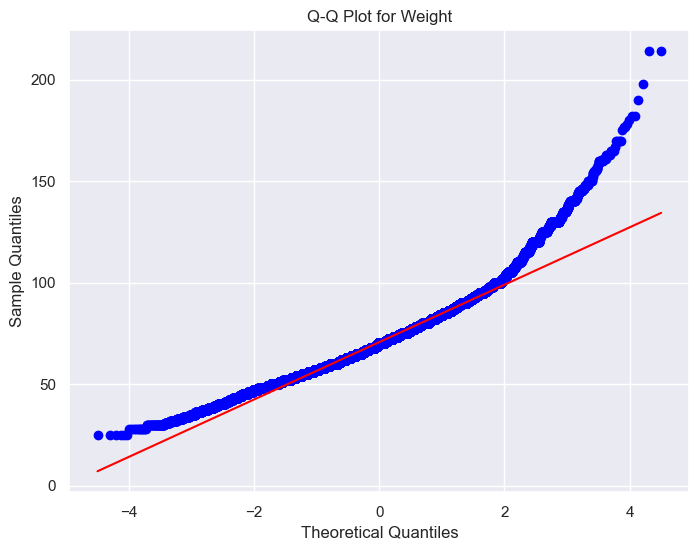

In [10]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(df['Weight'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Weight')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Result Interpretation:
- The Q-Q plot for the `Weight` column shows significant deviation from the normal distribution, especially in the upper tail.
- The data is skewed with outliers present at the higher values.
- Best way to handle missing values: Replace with the **median**, as it is less sensitive to outliers.

## Q-Q Plot for Height

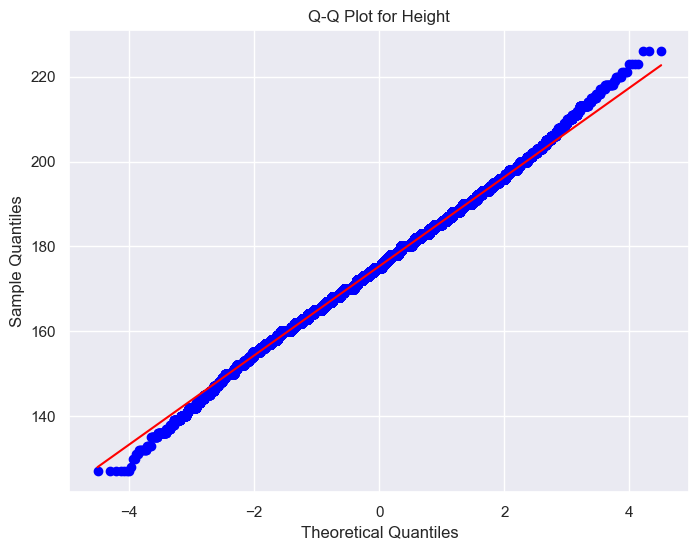

In [11]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Height'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Height')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Result Interpretation:
- The Q-Q plot for the `Height` column shows that the data is closely aligned with the normal distribution.
- There is minor deviation at the high values, but overall the data can be considered normally distributed.
- Best way to handle missing values: Replace with the **mean**, as the distribution is approximately normal.

## Q-Q Plot for Age

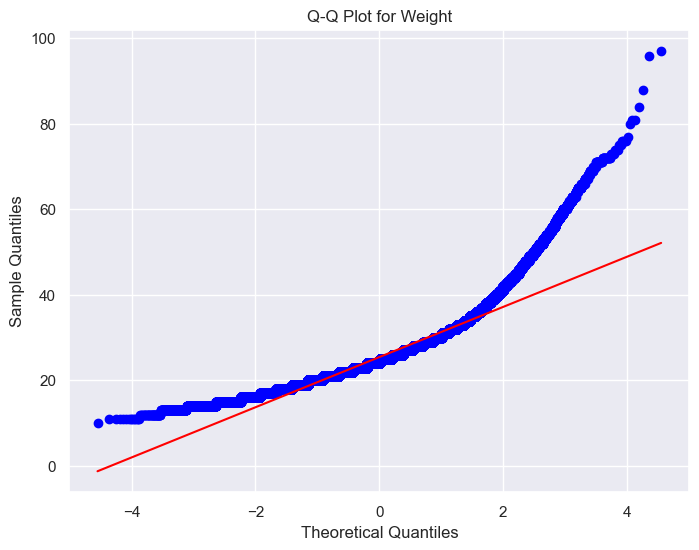

In [12]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Age'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot for Weight')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Result Interpretation:
- The Q-Q plot for the `Age` column shows significant deviation from the normal distribution, especially in the upper tail.
- The data is skewed with outliers present at the higher values.
- Best way to handle missing values: Replace with the **median**, as it is less sensitive to outliers.

### Replace the missing values

In [13]:
df['Weight'].fillna(df['Weight'].median(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Data Analysis

## Athlete participated the most (his/her name and ID)

In [14]:
most_participated_athlete_name = df['Name'].value_counts().idxmax()
most_participated_athlete_name

'Heikki Ilmari Savolainen'

In [15]:
most_participated_athlete_id = df.ID[df['Name'] == most_participated_athlete_name].unique()
most_participated_athlete_id

array([106296], dtype=int64)

## Number of cities we have and what are they

In [16]:
cities = df['City'].unique()
cities

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [17]:
num_of_cities = cities.shape[0]
num_of_cities

42

## Which countries have won the most medals in the last 30 years?

In [18]:
last_30_years_df = df[df['Year'] > df['Year'].max() - 30]

In [19]:
countries_most_medals = last_30_years_df.groupby(['NOC', 'Medal']).size().unstack()

In [20]:
countries_most_medals['number_of_medals'] = countries_most_medals['Gold'] + countries_most_medals['Silver'] + countries_most_medals['Bronze']
countries_most_medals.drop(['Gold', 'Silver', 'Bronze'], axis=1, inplace=True)
countries_most_medals.sort_values(by='number_of_medals', axis=0, ascending=False, inplace=True)

In [21]:
countries_most_medals.iloc[:3]

Medal,number_of_medals
NOC,
USA,2395.0
GER,1268.0
RUS,1148.0


## Sport with the highest number of participants in the Summer Olympics vs. the Winter Olympics

In [22]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

In [23]:
most_summer_sport_participation = summer_df['Sport'].value_counts().idxmax()
most_summer_sport_participation

'Athletics'

In [24]:
most_winter_sport_participation = winter_df['Sport'].value_counts().idxmax()
most_winter_sport_participation

'Cross Country Skiing'

## Sports of athletes over 70 years old

In [25]:
df[df['Age'] > 70]['Sport'].value_counts()

Sport
Art Competitions    48
Sailing              5
Equestrianism        3
Shooting             3
Archery              2
Name: count, dtype: int64

This table highlights the number of athletes over the age of 70 who have competed in various Olympic events. Notably, the majority of these individuals participated in **Art Competitions**, which historically were part of the Olympic Games in the early 20th century.

| Sport              | Number of Athletes Over 70 |
|--------------------|----------------------------|
| **Art Competitions** | 48                        |
| **Sailing**          | 5                         |
| **Equestrianism**    | 3                         |
| **Shooting**         | 3                         |
| **Archery**          | 2                         |

## Sport of athletes under 18 years old

In [26]:
df[df['Age'] < 18]['Sport'].value_counts()

Sport
Swimming                     4863
Gymnastics                   3855
Athletics                     542
Alpine Skiing                 471
Figure Skating                362
Diving                        331
Rhythmic Gymnastics           214
Speed Skating                 174
Rowing                        138
Boxing                        129
Ski Jumping                   113
Short Track Speed Skating     105
Cycling                        94
Fencing                        83
Cross Country Skiing           73
Shooting                       69
Football                       68
Archery                        65
Sailing                        57
Synchronized Swimming          52
Canoeing                       51
Tennis                         49
Table Tennis                   48
Ice Hockey                     47
Weightlifting                  46
Freestyle Skiing               40
Judo                           38
Water Polo                     37
Volleyball                     36
Luge    


This table presents the number of athletes under the age of 18 who have participated in various Olympic events. The data highlights that certain sports, particularly **Swimming** and **Gymnastics**, have had a significant number of young participants, likely due to the physical demands and early peak performance age in these disciplines.

| Sport                           | Number of Athletes Under 18 |
|---------------------------------|-----------------------------|
| **Swimming**                    | 4863                        |
| **Gymnastics**                  | 3855                        |
| **Athletics**                   | 542                         |
| **Alpine Skiing**               | 471                         |
| **Figure Skating**              | 362                         |
| **Diving**                      | 331                         |
| **Rhythmic Gymnastics**         | 214                         |
| **Speed Skating**               | 174                         |
| **Rowing**                      | 138                         |
| **Boxing**                      | 129           -War**                  | 1                           |

#### Key Insights:
- **Swimming** and **Gymnastics** dominate the list with the highest number of under-18 participants, reflecting the early specialization and intense training regimes in these sports.
- Other sports with significant youth participation include **Athletics** (542), **Alpine Skiing** (471), and **Figure Skating** (362), which similarly have a culture of developing young talent early.
- Events like **Rhythmic Gymnastics** (214) and **Diving** (33more demanding in terms of experience or physical development.


## The Number of males and females and how the participation of male vs. female athletes changed over the years

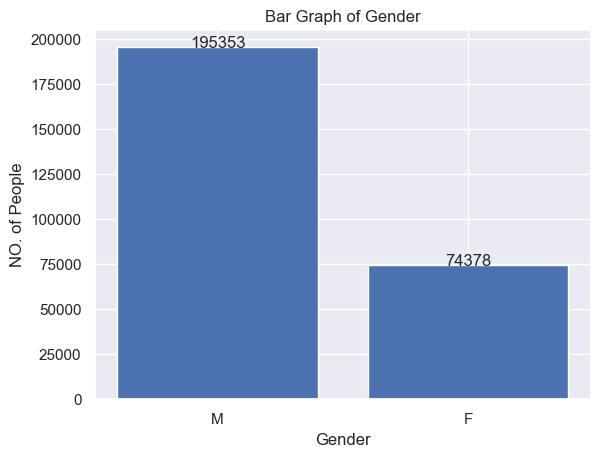

In [27]:
gender = df['Sex'].value_counts()
plt.bar(gender.index, gender.values)
plt.title('Bar Graph of Gender')
plt.xlabel('Gender')
plt.ylabel('NO. of People')

for i, value in enumerate(gender.values):
    plt.text(i, value + 0.5, value, ha='center')

plt.show()

In [28]:
# make a dataframe for males and dataframe for females
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']

In [29]:
# sort the values of male dataframe by the year
male_df.sort_values(by='Year', axis=0, inplace=True)

In [30]:
# sort the values of female dataframe by the year
female_df.sort_values(by='Year', axis=0, inplace=True)

In [31]:
# number of males and females in each year
number_of_males_each_year = male_df.groupby('Year')['Sex'].size()
number_of_females_each_year = female_df.groupby('Year')['Sex'].size()

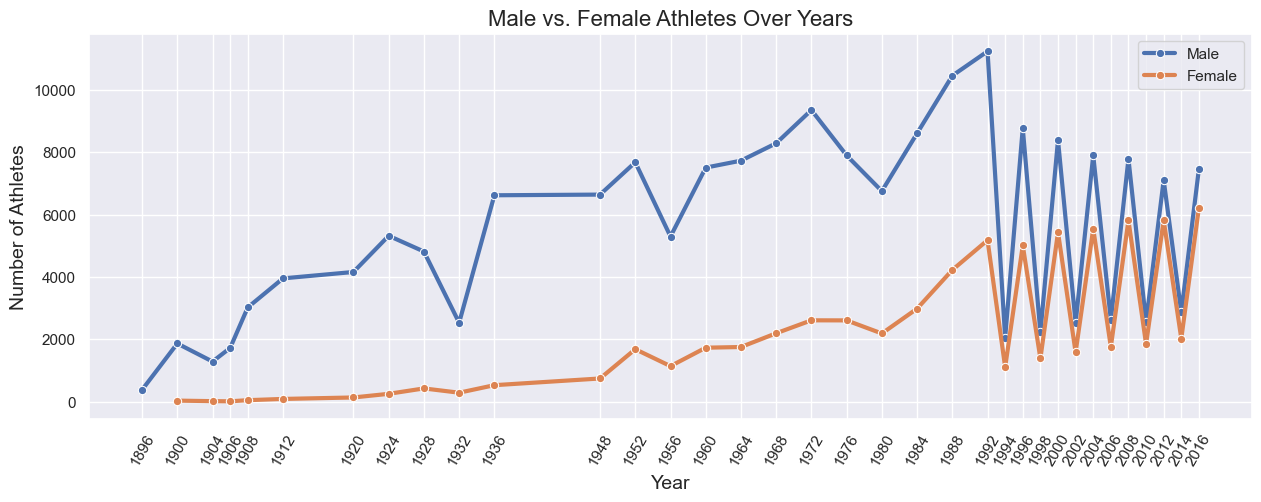

In [32]:
plt.figure(figsize=(15, 5))

sns.lineplot(x=male_df['Year'].unique(), y=number_of_males_each_year.values, label='Male', linewidth=3, marker='o')
sns.lineplot(x=female_df['Year'].unique(), y=number_of_females_each_year.values, label='Female', linewidth=3, marker='o')
plt.xticks(number_of_males_each_year.index,  rotation=60)

plt.title("Male vs. Female Athletes Over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Athletes", fontsize=14)

plt.legend()
plt.show()



### Key Points:
- **1896**: No female athletes in the odern Olympics.
- **1900 - 1920**: Slow growth in female participation; male athletes increase steadily.
- **1920 - 1948**: Post-WWI, male athletes rise significantly; female participation remains low.
- **Post-WWII**: Steady growth for both genders, though male athletes still dominate.
- **1984 - 2000**: A notable rise in female athletes, largely due to the gender equality movement.
- **2000 - 2016**: The gender gap narrows significantly, with female athletes nearing paritorg/sports).


## Number of Athletes for each year

In [33]:
# Number of athletes for each year (chronologically)
number_of_athlete_each_year = df.groupby('Year')['Name'].count().sort_index(ascending=True)

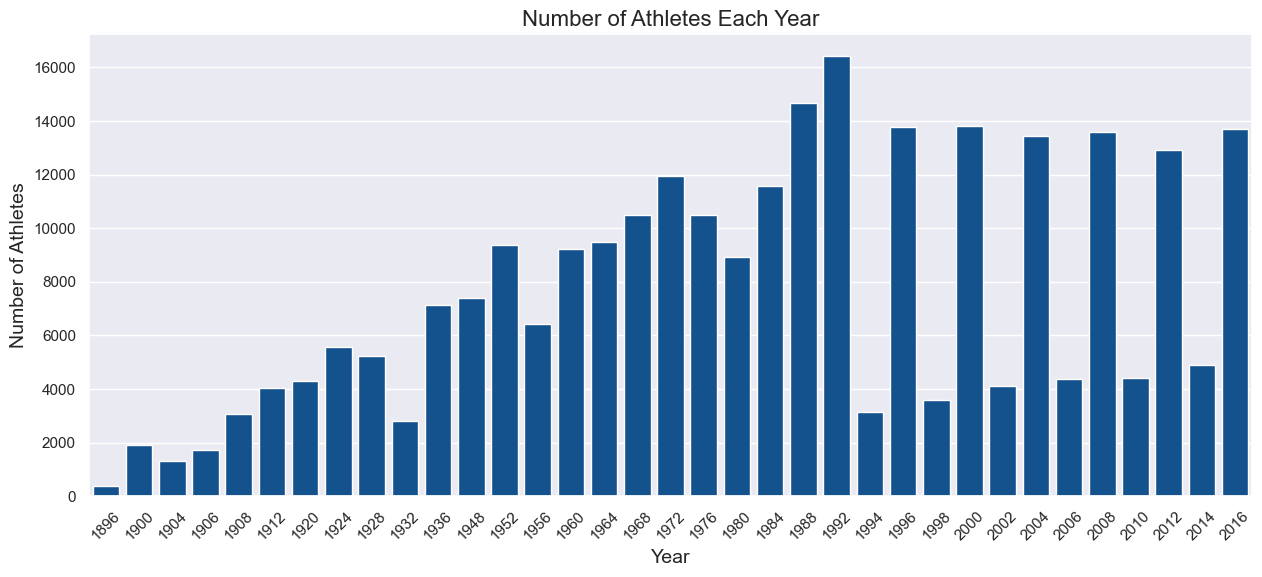

In [34]:
plt.figure(figsize=(15, 6))

sns.barplot(x=number_of_athlete_each_year.index, y=number_of_athlete_each_year, color='#0052A2')

plt.title('Number of Athletes Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)

plt.xticks(rotation=45)
plt.show()

### Key Points:
- **Early Olympics (1896 - 1904)**: The number of athletes was significantly lower compared to later years. This is because the early modern Olympics had fewer participants and events.
- **Post-WWII Growth (1948 - 1980)**: After World War II, there is a sharp increase in the number of athletes. This period marks the expansion of the Olympics, as more countries began participating.
- **1984 - Present**: The number of athletes increases dramatically, peaking in 1992 due to global participation and the inclusion of more events.
- **Decline in Specific Years**: The drop in some years (like during the world wars) reflects the cancellation or reduction of events during these periods.

## Number of sports in each year

In [35]:
sports_each_year = df.groupby(['Sport', 'Year']).size().unstack().notnull().sum()

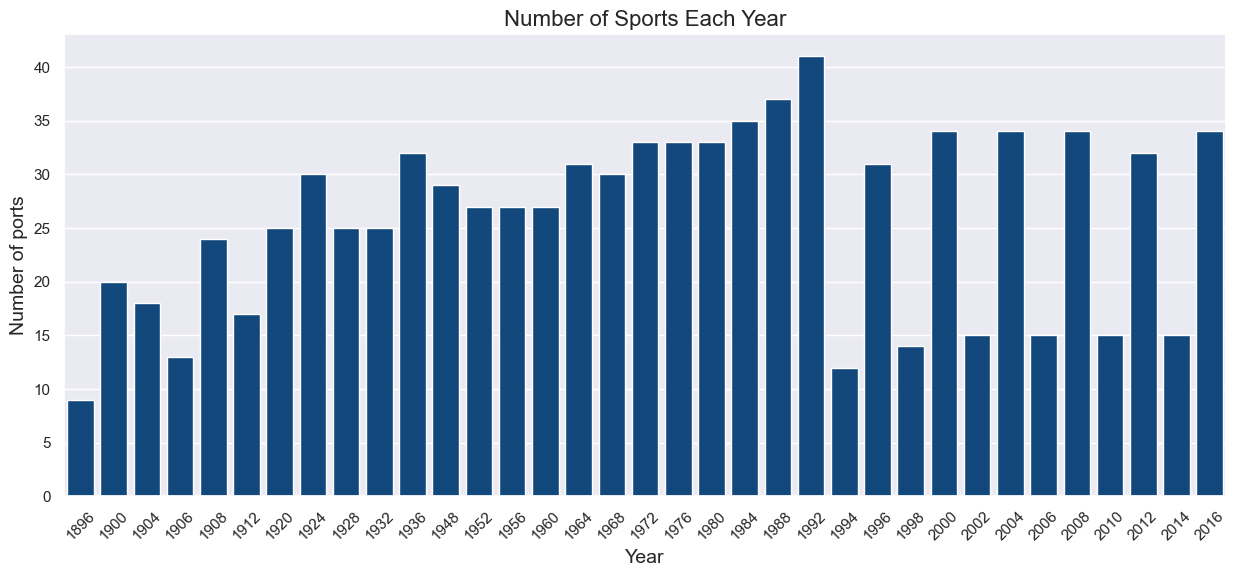

In [36]:
plt.figure(figsize=(15, 6))

sns.barplot(x=sports_each_year.index, y=sports_each_year, color='#00498D')

plt.title('Number of Sports Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of ports', fontsize=14)

plt.xticks(rotation=45)
plt.show()

#### Key Observations:
- **Early Olympics (1896-1920)**: The initial Olympic Games saw a relatively low number of sports, typically fewer than 25. This period marks the formative years of the modern Olympics with limited events.
- **Growth in the 1920s-1980s**: The number of sports steadily increased, with notable peaks occurring in the 1924 and 1984 Olympics. This reflects the expansion of the Olympic program as more sports and events were introduced.
- **Modern Era (1990s-Present)**: The number of sports fluctuates slightly, with most modern Olympics hosting around 28 to 35 sports. The 1992 game witnessed the highest number of sports, reaching over 40.

## The number of each medal for each year

In [37]:
num_medal_each_year = df.groupby(['Year', 'Medal']).size().unstack()
num_medal_each_year.columns = ['N_' + col for col in num_medal_each_year.columns]
num_medal_each_year.head()

,N_Bronze,N_Gold,N_Silver
Year,,,
1896,38,62,43
1900,175,198,220
1904,150,173,163
1906,145,157,156
1908,256,294,281


# plotting the previous table

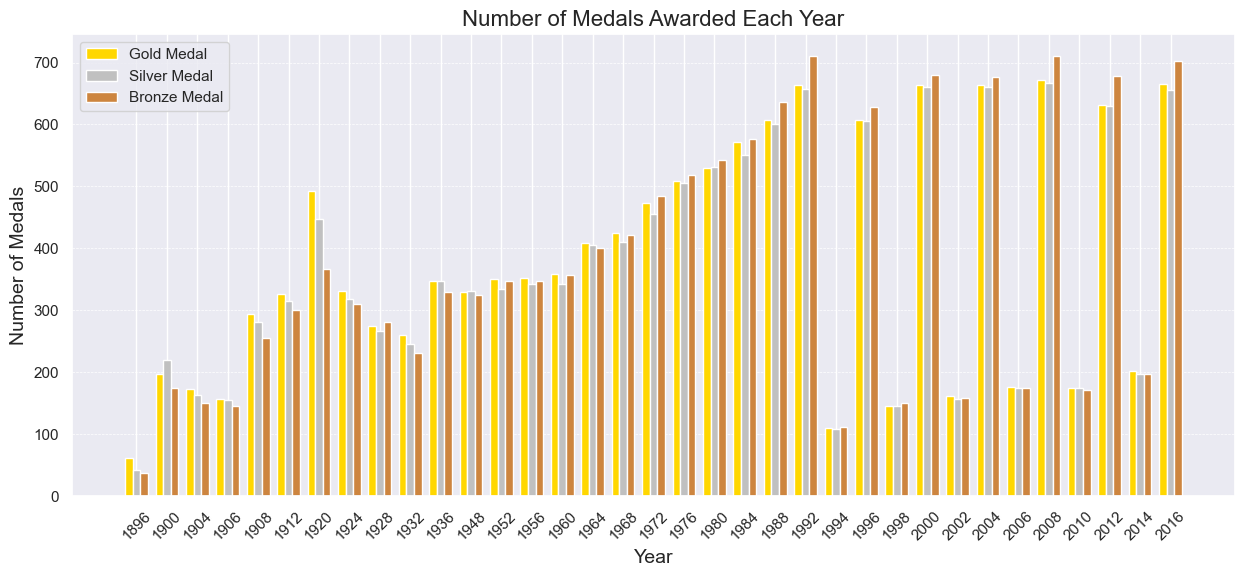

In [38]:
bar_width = 0.25

r1 = np.arange(len(num_medal_each_year))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15, 6))

plt.bar(r1, num_medal_each_year['N_Gold'], color='gold', width=bar_width, label='Gold Medal')
plt.bar(r2, num_medal_each_year['N_Silver'], color='silver', width=bar_width, label='Silver Medal')
plt.bar(r3, num_medal_each_year['N_Bronze'], color='peru', width=bar_width, label='Bronze Medal')

plt.title('Number of Medals Awarded Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.xticks([r + bar_width for r in range(len(num_medal_each_year))], num_medal_each_year.index, rotation=45)

plt.legend()
plt.show()

### Key Points:
- **Early Years (1896-1920)**: In the early Olympic Games, the number of medals was relatively low. The counts gradually increased as the Olympics grew in popularity and events and more countries began participating.
- **1920s-1980s Growth**: There is a steady increase in the number of medals awarded in each category, reflecting the growth in the number of events and participants over time.
- **Modern Olympics (1990s-Present)**: A notable rise in medals can be seen starting from the 1990s, where more than 2000 medals were awarded in many editions, with the peak number occurring in the 1992. This is due to the global expansion of the games and population and the inclusion of more sports.ver time.
tegories.


## Analysis of Top 10 Teams in Terms of Athletes and Gold Medals

### Number of athletes in each team

In [39]:
num_of_athletes_each_team = df.groupby(['Team'])['ID'].count()
num_of_athletes_each_team = num_of_athletes_each_team.sort_values(ascending=False)
num_of_athletes_each_team = num_of_athletes_each_team[:10]

In [40]:
num_of_athletes_each_team

Team
United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: ID, dtype: int64

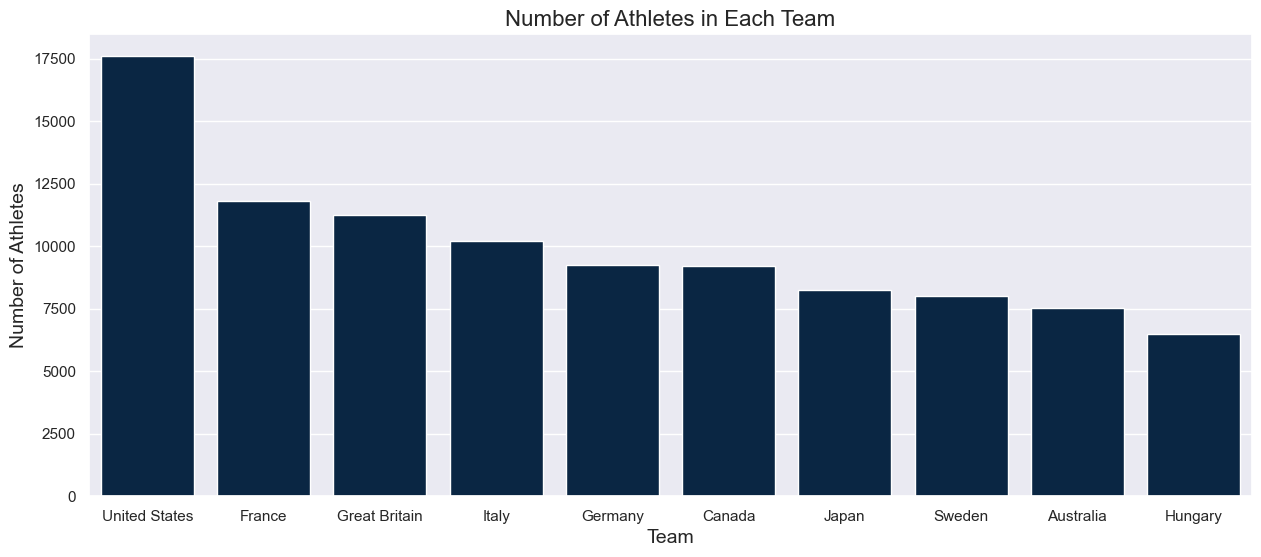

In [41]:
plt.figure(figsize=(15, 6))

sns.barplot(x=num_of_athletes_each_team.index, y=num_of_athletes_each_team, color='#00264D')

plt.title('Number of Athletes in Each Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)

plt.show()

### Number of gold medals awarded for each team

In [42]:
num_medal_each_team = df.groupby(['Team', 'Medal']).size().unstack()
num_medal_each_team.columns = ['N_' + col for col in num_medal_each_team.columns]
num_medal_each_team = num_medal_each_team['N_Gold']
num_medal_each_team = num_medal_each_team.sort_values(ascending=False)
num_medal_each_team = num_medal_each_team[:10]
num_medal_each_team.head()

Team
United States    2474.0
Soviet Union     1058.0
Germany           679.0
Italy             535.0
Great Britain     519.0
Name: N_Gold, dtype: float64

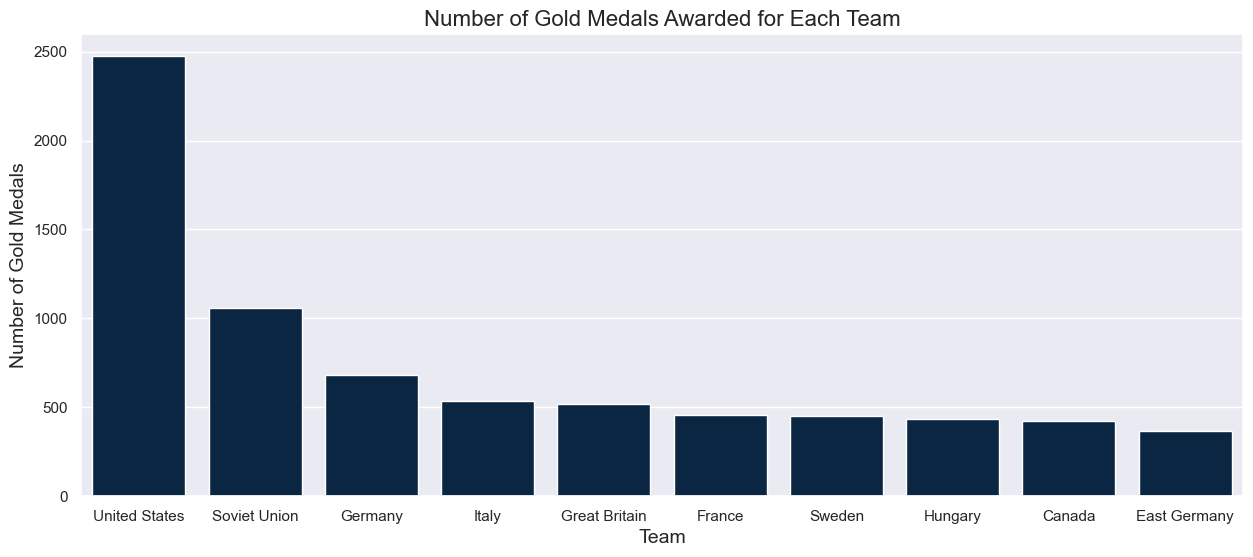

In [43]:
plt.figure(figsize=(15, 6))

sns.barplot(x=num_medal_each_team.index, y=num_medal_each_team, color='#00264D')

plt.title('Number of Gold Medals Awarded for Each Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Gold Medals', fontsize=14)

plt.show()

The two bar plots above represent the following:

1. **Number of Athletes in Each Team**:
   The first plot showcases the top 10 teams with the highest number of athletes that have participated in the Olympics. The **United States** dominates the list with the highest number of athletes, approximately 17,500. Following this are **France**, **Great Britain**, **Italy**, and **Germany**, each having around 10,000 to 12,500 athletes. Other notable teams in this list include **Canada**, **Japan**, **Sweden**, **Australia**, and **Hungary**, each with around 7,000 to 9,000 athletes.

2. **Number of Gold Medals Awarded for Each Team**:
   The second bar plot presents the top 10 teams in terms of the number of gold medals they have been awarded. The **United States** leads significantly with about 2,500 gold medals. The second-highest is the **Soviet Union** with over 1,000 gold medals, followed by **Germany** and **Italy** with around 500 to 750 gold medals. Other teams in the top 10 include **Great Britain**, **France**, **Sweden**, **Hungary**, **Canada**, and **East Germany**, each earning between 300 to 500 gold medals.

### Insights:
- **United States** team stands out in both categories, with a significant margin in terms of both the number of athletes and gold medals. The large number of athletes likely contributes to their success in securing a large number of gold medals.
- While **France** and **Great Britain** are close in terms of the number of athletes, their number of gold medals is significantly lower than that of the **United States** and the **Soviet Union**.
- Countries like **Sweden**, **Hungary**, and **Canada** appear in the top 10 of both athletes and gold medals, showing consistent performance across the board despite having smaller contingents compared to larger nations like the **United States**.ed States**.


## Number of winners with gold medal in each city

In [44]:
# number_of_winners_each_city = df.groupby(['City', 'Medal']).size().unstack()
# number_of_winners_each_city.columns = ['N_' + col for col in number_of_winners_each_city.columns]
# number_of_gold_winners_each_city = number_of_winners_each_city.N_Gold.sort_values(ascending=False)

In [45]:
# plt.figure(figsize=(10, 15))

# sns.barplot(x=number_of_gold_winners_each_city, y=number_of_gold_winners_each_city.index, palette='winter', order=number_of_gold_winners_each_city.index)
# plt.title('Number of Gold Medal Winners in Each City')
# plt.xlabel('Number of Winners')
# plt.ylabel('City')
# plt.show()

## How the number of athletes changed over time for Summer and Winte

In [46]:
summer_df = df[df['Season'] == 'Summer']
winter_df = df[df['Season'] == 'Winter']

summer_df.sort_values(by='Year', axis=0, inplace=True)
winter_df.sort_values(by='Year', axis=0, inplace=True)

In [47]:
number_of_athletes_each_year_summer = summer_df.groupby('Year')['ID'].size()
number_of_athletes_each_year_winter = winter_df.groupby('Year')['ID'].size()

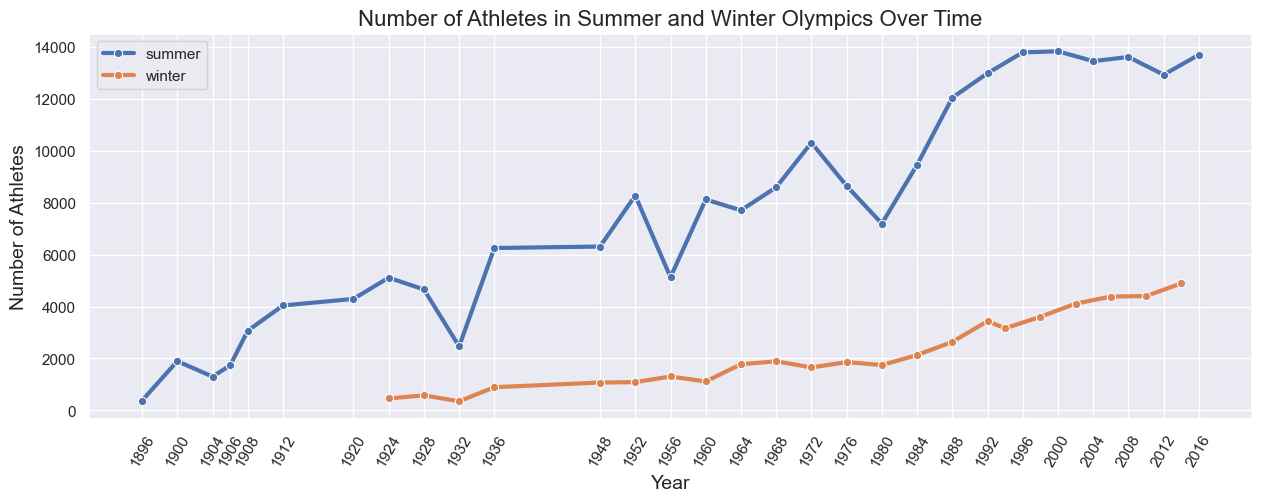

In [48]:
plt.figure(figsize=(15, 5))

sns.lineplot(x=summer_df['Year'].unique(), y=number_of_athletes_each_year_summer.values, label='summer', linewidth=3, marker='o')
sns.lineplot(x=winter_df['Year'].unique(), y=number_of_athletes_each_year_winter.values, label='winter', linewidth=3, marker='o')

plt.xticks(summer_df['Year'].unique(), rotation=60)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)
plt.title('Number of Athletes in Summer and Winter Olympics Over Time', fontsize=16)

plt.legend()
plt.show()

### Key Points:
- **Summer:** The Summer Olympics has seen a significant and irregular increase in athlete participation, especially after the 1950s, with some fluctuations. Significant interruptions can be observed during the periods surrounding the two world wars (1914-1918 and 1939-1945) when the Olympic Games were canceled or postponed.

- **Winter:** The Winter Olympics, on the other hand, show a more gradual and consistent increase in the number of athletes.

## Relationship between Height and Weight with Medal Types

In [49]:
correlation = df['Height'].corr(df['Weight'])
correlation

0.7865134584512208

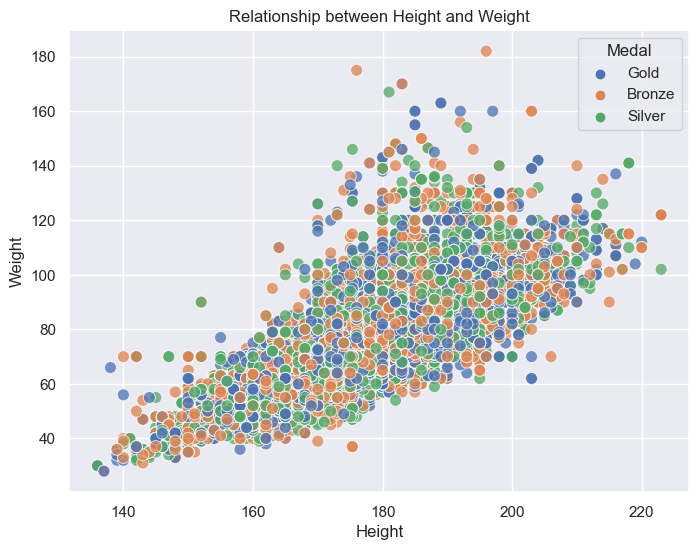

In [50]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['Medal'], data=df, s=75, alpha=0.75)
plt.title('Relationship between Height and Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()



### Key Observations:
- **Correlation**: There's a positive correlation between height and weight, meaning that taller athletes tend to weigh more, which is expected.
- **Distribution**: The distributions of height and weight are wide, covering a broad range of values, but they are more concentrated in the middle ranges (e.g., heights between 160-200 cm and weights between 60-120 kg).
- **Medal Insights**: The scatter points are color-coded by medal type, but no clear pattern emerges to suggest that any specific medal is strongly associated with a particular height or  values.
